# **Regularization**



## **Concepts Covered:**


- <a href=#link1>(1) 🧩 Introduction to Regularization</a>  
- <a href=#link2>(2) 🧮 Data Preparation for Model Building</a>  
- <a href=#link3>(3) 📏 Metrics for Model Evaluation</a>  
- <a href=#link4>(4) 📈 Linear Regression Model (LRM)</a>  
- <a href=#link5>(5) 🧠 Model Complexity</a>  
- <a href=#link6>(6) 🧮 Regularization</a>  
- <a href=#link7>(7) 🏔️ Ridge Regression ($L_2$ Regularization)</a>  
- <a href=#link8>(8) 🎯 Ridge Regression with Optimized $\lambda$</a>  
- <a href=#link9>(9) 🧩 LASSO Regression ($L_1$ Regularization)</a>  
- <a href=#link10>(10) 🎯 LASSO Regression with Optimized $\lambda$</a>  




----
## **Prelinimaries**


### **Google Colab**

The following is required if we are runing the code in Colab.

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

<a id="link1"></a>

## (1) 🧩 Introduction to Regularization

Regularization methods are used to **prevent overfitting** in regression models by adding a **penalty** to large coefficient values.  
The goal is to improve the model’s **generalization ability** — that is, its performance on unseen data.  

---

### 🔍 Why Regularization?
When we fit a linear regression model, the estimated coefficients can become very large if:
- There is **multicollinearity** (high correlation between predictors).
- The number of predictors is large relative to the number of observations.

Large coefficients make the model unstable and sensitive to noise.  
Regularization introduces a **penalty term** to shrink these coefficients, balancing bias and variance.

---

### ⚖️ Two Common Regularization Methods

| Method | Penalty | Effect |
|:--|:--|:--|
| **Ridge Regression** | $L_2$ penalty | Shrinks coefficients smoothly toward zero |
| **Lasso Regression** | $L_1$ penalty | Forces some coefficients **exactly** to zero (feature selection) |


---

📘 **Note:** More about this later.


### **Loading required packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from IPython.display import HTML


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

### **Importing the Data**

Read the healthcare dataset file. Run the first line if running on Google Colab,
and the second one if running locally.

In [2]:
data = pd.read_csv('/Users/fernandodiaz/Library/CloudStorage/OneDrive-UniversidadTécnicaFedericoSantaMaría/Machine Learning Supervisado/Data/healthcare_data.csv')

In [3]:
# Copying data to another variable to avoid any changes to original data
same_data = data.copy()

Let´s briefly review our data set.

In [4]:
# Checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  348112 non-null  object 
 11  Visitors with Patient              5000

Again, we drop *patientid* from the data as it is an identifier and will not add value to the analysis.

In [5]:
data=data.drop(columns=["patientid"])

We double check that there are no duplicates.

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
# List of all important categorical variables
cat_col = ["Department", "Type of Admission", 'Severity of Illness', 'gender', 'Insurance', 'health_conditions', 'doctor_name', "Ward_Facility_Code", "Age"]


---

<a id="link2"></a>

## (2) 🧮 Data Preparation for Model Building

Before building any model, we must prepare the dataset properly to ensure the algorithms can process the features efficiently and without bias.

---

### 🧩 Key Steps in Data Preparation

1. **Encode categorical features**  
   Machine learning models work with numbers — not text.  
   Categorical variables (like *gender*, *region*, *department*) are encoded using techniques such as:  
   - **Label Encoding** (for ordinal categories)  
   - **One-Hot Encoding** (for nominal categories)

2. **Separate Independent and Dependent Variables**  
   - The **independent variables** $X$ contain all predictor features.  
   - The **dependent variable** $y$ is what we aim to predict.  
   $$
   y = f(X) + \epsilon
   $$
   where $\epsilon$ is the error term.

3. **Split into Training and Testing Sets**  
   - The dataset is split into two parts:
     - **Training set:** used to fit the model.
     - **Testing set:** used to evaluate its performance on unseen data.  
   - A common split is **80% training / 20% testing**, though this can vary depending on data size and purpose.

---




In [8]:
# Creating dummy variables for the categorical columns
# drop_first=True is used to avoid redundant variables
data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

Let's check the data after handling categorical data:

In [9]:
data

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days),Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,doctor_name_Dr John,doctor_name_Dr Mark,doctor_name_Dr Nathan,doctor_name_Dr Olivia,doctor_name_Dr Sam,doctor_name_Dr Sarah,doctor_name_Dr Simon,doctor_name_Dr Sophia,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,gender_Male,gender_Other,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_Other,Insurance_Yes
0,4,0,4,2966.408696,8,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
1,4,2,2,3554.835677,9,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False
2,2,8,2,5624.733654,7,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
3,4,7,4,4814.149231,8,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
4,2,10,2,5169.269637,34,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4,2,3,4105.795901,10,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False
499996,13,8,2,4631.550257,11,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
499997,2,3,2,5456.930075,8,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
499998,2,1,2,4694.127772,23,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False


Separating independent variables and the target variable:

In [10]:
x = data.drop('Stay (in days)',axis=1)
y = data['Stay (in days)']

### ✂️ Train-Test Split

To evaluate how well our model generalizes to unseen data, we divide our dataset into **training** and **testing** subsets.  
This allows us to train the model on one portion of the data and then test its performance on new, unseen samples.

---

We use the **`train_test_split`** function from the `sklearn.model_selection` module — part of the powerful **scikit-learn** library ([documentation](https://scikit-learn.org/stable/)).

This function randomly splits arrays or DataFrames into training and testing sets, maintaining the relationship between features ($X$) and labels ($y$).

---

### 🧠 Syntax reminder

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

Checking the shape of the train and test data

In [12]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (400000, 41)
Shape of test set :  (100000, 41)


---

<a id="link3"></a>

## (3) 📏 Common Regression Metrics

Once we train a regression model, we need to evaluate **how well it predicts** unseen data.  
Different metrics capture different aspects of model accuracy and stability.

---

| Metric | Definition | Interpretation |
|:--|:--|:--|
| **MAE** (Mean Absolute Error) | $MAE$ | Average absolute deviation — robust to outliers. |
| **MSE** (Mean Squared Error) | $MSE$ | Penalizes larger errors more strongly. |
| **RMSE** (Root Mean Squared Error) | $RMSE$ | Same units as $y$, easier to interpret. |
| **$R^2$** (Coefficient of Determination) | $R^2$ | Proportion of variance explained by the model. |
| **Adjusted $R^2$** | Adjusted $R^2$ | Adjusts $R^2$ for the number of predictors ($k$). |
| **MAPE** (Mean Absolute Percentage Error) | $MAPE$ | Expresses prediction error as a percentage. |

---

### 🧮 Mathematical Definitions

$$
MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

$$
MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

$$
RMSE = \sqrt{MSE}
$$

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

$$
Adjusted\ R^2 = 1 - (1 - R^2)\frac{n - 1}{n - k - 1}
$$

$$
MAPE = \frac{100}{n}\sum_{i=1}^{n} \left|\frac{y_i - \hat{y}_i}{y_i}\right|
$$

---

📘 **Next:** We’ll define a Python function to compute all these metrics efficiently for our regression models.


In [13]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

---

<a id="link4"></a>

## (4) 📈 Linear Regression Model (LRM)

Before diving into regularization techniques, let’s briefly revisit the **Linear Regression Model (LRM)**.

Instead of using `statsmodels.api`, we’ll use the **`LinearRegression`** class from the `linear_model` module of the **scikit-learn** library — one of the most popular tools for machine learning in Python.

---

### 🧠 Concept Recap

The **Linear Regression Model** assumes a linear relationship between the dependent variable $y$ and a set of independent variables $X_1, X_2, \dots, X_p$:

$$
y_i = \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \cdots + \beta_p X_{ip} + \epsilon_i
$$

where:  
- $\beta_0$ → intercept (constant term)  
- $\beta_j$ → slope coefficient for predictor $X_j$  
- $\epsilon_i$ → error term capturing unexplained variation  

---

### ⚙️ Implementation in scikit-learn

Scikit-learn’s `LinearRegression` fits the model using **Ordinary Least Squares (OLS)** by minimizing the **Residual Sum of Squares (RSS)**:

$$
RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where $\hat{y}_i$ are the model’s predicted values.

---




In [15]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

print("Coefficients: ", model.coef_)

Coefficients:  [ 7.86011825e-02 -9.24581600e-04  2.16032581e-04 -3.83898869e-05
  6.08222762e+00 -3.97322274e+00 -4.62163474e+00  6.87675974e+00
 -1.22173775e+00  4.34865964e-01 -1.27546790e+00  3.08405364e-01
 -1.47601709e+00  2.38041577e-01 -1.61513502e+00 -1.32145112e+00
 -1.46811850e+00 -1.52644356e+00 -2.90889364e-01  1.94492630e+00
 -8.92763759e-01 -1.27377868e+01 -1.04829928e+01 -1.34354610e+01
 -1.35113333e+01 -3.66513882e-01 -4.21693414e-01 -2.19302475e-01
 -1.74421929e-02 -2.59854742e-01  1.79025487e+00 -2.57292828e-02
 -6.66988605e-02  1.50153511e-01  4.31961072e-02  9.87477156e-02
 -3.51239328e-01  5.94307858e-01 -3.66904398e-02  6.50726787e-03
 -1.06540417e-02]


### 🧩 Creating the Linear Regression Model

By executing `model = LinearRegression()`, we **instantiate** the `LinearRegression` class, creating an object named `model` that represents our **linear regression model**.

---

### 🧠 What this means

- The object `model` is now an **instance** of the `LinearRegression` class — think of it as an empty model, ready to be trained.  
- When we later call `model.fit(X_train, y_train)`, the model will **learn** the relationship between the independent variables (features) and the dependent variable (target).  
- Internally, it estimates the coefficients $\beta_0, \beta_1, \dots, \beta_p$ that minimize the **Residual Sum of Squares (RSS)**.

---

📘 **Next:** We’ll fit the model to our training data and examine its coefficients and performance metrics.


### **Performance of the Model in the Train Data and in the Test Data**

Checking the performance of the model on the training data:

In [16]:
linear_reg = model_performance_regression(model, x_train, y_train)
linear_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.135093,2.146244,0.842813,0.842796,19.591833


Checking the performance of the estimated model on the testing data:

In [17]:
linear_reg_test = model_performance_regression(model, x_test, y_test)
linear_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144055,2.155765,0.843028,0.842964,19.676966


**Observations**:

-The Root Mean Squared Error and the adjusted $R^2$ of train and test data arevery close, indicating thatour model is not overfitting to the training data.

---

<a id="link5"></a>

## (5) 🧠 Model Complexity

**Regularization** is a core idea in machine learning and statistical modeling — it helps prevent **overfitting** by introducing constraints on model parameters.

---

### ⚠️ Overfitting vs. Regularization

- **Overfitting** happens when a model learns the *noise* in the training data rather than the true underlying patterns.  
- **Regularization** combats this by adding a **penalty** on large coefficient values, effectively controlling model flexibility.  
- This creates a **bias–variance trade-off**, where we accept a small increase in bias to achieve a large reduction in variance.  
  🔗 [Read more on the bias–variance tradeoff](https://towardsdatascience.com/what-is-bias-variance-tradeoff-c8b19772e054)

---

### ⚙️ What is Model Complexity?

In machine learning, **model complexity** refers to how flexible a model is in fitting data.  
A more complex model can fit intricate patterns but is also more prone to memorizing noise.  
(📚 Source: [ScienceDirect – Model Complexity](https://www.sciencedirect.com/topics/computer-science/model-complexity))

Key contributors to complexity include:

- **Number of parameters:** Models with many parameters (e.g., high-degree polynomials) can fit training data closely.  
- **Model structure:** Deep neural networks with multiple layers are more complex than linear models.  
- **Feature space:** Using many predictors or derived variables (e.g., interactions, polynomials) increases complexity.  
- **Interactions & nonlinearity:** Adding feature interactions or powers of variables increases flexibility — and risk.

---

### 🎯 Consequences of Model Complexity

- As complexity **increases**, the risk of **overfitting** grows — the model captures random noise, not structure.  
- When too **simple**, the model **underfits**, missing important relationships.  
- The ideal model finds a **balance**: simple enough to generalize, yet flexible enough to capture real patterns.

---

### 🔑 Key Takeaway

A model that performs perfectly on training data may fail on test data.  
If a model is too complex, it learns the training set *too well*, losing its ability to **generalize**.  
Regularization techniques such as **Ridge** and **Lasso Regression** directly address this issue by **penalizing complexity**.

---





---

<a id="link6"></a>

## (6) 🧮 Regularization



---

### 🎯 Purpose

**Regularization** aims to prevent **overfitting** by introducing **constraints** on the size of model coefficients.  
It modifies the model’s **loss function** by adding a **penalty term**, which discourages overly complex models and helps the model generalize better to unseen data.

---

### ⚙️ Intuition

- Without regularization, linear regression minimizes only the **Residual Sum of Squares (RSS)**:
  $$
  RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$

- With regularization, we **add a penalty** to control the magnitude of coefficients:
  $$
  Loss = RSS + \lambda \, \text{Penalty}
  $$
  where:
  - $\lambda$ = regularization strength (hyperparameter)
  - Larger $\lambda$ → stronger shrinkage → simpler model  

---
### ⚖️ Two Common Regularization Methods

| Method | Penalty | Effect |
|:--|:--|:--|
| **Ridge Regression** | $L_2$ penalty | Shrinks coefficients smoothly toward zero |
| **Lasso Regression** | $L_1$ penalty | Forces some coefficients **exactly** to zero (feature selection) |

$$
\text{Ridge: } \lambda \sum_{j=1}^{p} \beta_j^2 \qquad\text{Lasso: } \lambda \sum_{j=1}^{p} |\beta_j|
$$




---

### 🧠 Interpretation

Both Ridge and Lasso aim to **balance bias and variance**, improving model generalization.  
However, they differ in *how* they constrain coefficients:
- **Ridge**: distributes penalty evenly — ideal for correlated predictors.  
- **Lasso**: promotes sparsity — ideal when only a few predictors matter.

---

📘 **Next:** We’ll visualize the geometry of Ridge vs. Lasso regularization and understand why their penalty shapes lead to different coefficient behaviors.


---

<a id="link7"></a>

## (7) 🏔️ Ridge (Regression Identification for Generalized Estimators) Regression ($L_2$ Regularization)

**Ridge Regression** is a type of linear regression in which a small amount of **bias** is intentionally introduced to improve **out-of-sample predictions**.  
It helps combat **multicollinearity** and **overfitting** by shrinking the regression coefficients toward zero — but never exactly to zero.

---

### 🧮 The $L_2$ Penalty

The $L_2$ penalty (or **Ridge penalty**) is the sum of the squares of the regression coefficients:

$$
\text{$L_2$ penalty} = \lambda \sum_{j=1}^{k} \beta_j^2
$$

where:
- $\beta_j$ = coefficient of the $j^{th}$ predictor  
- $k$ = total number of predictors  
- $\lambda$ = regularization parameter (controls the penalty strength)

This penalty term is added to the **cost function**.

---

### 📘 Revisiting OLS

Recall that the **Ordinary Least Squares (OLS)** estimator is given by:

\begin{equation*}
\hat{\beta} = (X'X)^{-1} X'Y,
\end{equation*}

where:
- $X$ is an $n \times k$ matrix of $n$ observations and $k$ features,  
- $Y$ is an $n \times 1$ vector of outcomes.

Assuming both $X$ and $Y$ are centered (so the intercept is omitted), the OLS estimator minimizes the **Residual Sum of Squares (RSS):**

$$
\text{RSS} = \sum_{i=1}^{n} (y_i - \sum_{j=1}^{k} x_{ij}\beta_j)^2
$$

---

### ⚙️ Ridge Estimator

Ridge regression modifies the OLS solution by adding a small constant $\lambda$ to the diagonal of $X'X$ **before taking its inverse:**

\begin{equation*}
\hat{\beta}_{ridge} = (X'X + \lambda I_k)^{-1} X'Y
\end{equation*}

where $I_k$ is the $k \times k$ identity matrix.

---

### 🧠 Optimization Problem

The Ridge estimator $\hat{\beta}_{ridge}$ solves the following **constrained optimization problem:**

\begin{gather*}
\min_{\beta} \sum_{i=1}^n \left(y_i - \sum_{j=1}^k x_{ij}\beta_j\right)^2 \\
\text{s.t.} \quad \sum_{j=1}^k \beta_j^2 < c
\end{gather*}

for some constant $c > 0$.

This is equivalent to the **penalized regression problem:**

\begin{equation}
\min_{\beta} \sum_{i=1}^n \left(y_i - \sum_{j=1}^k x_{ij}\beta_j\right)^2 + \lambda \sum_{j=1}^k \beta_j^2
\end{equation}

---

### 🎯 Interpretation

The parameter $\lambda$ controls the strength of the penalty:
- When $\lambda = 0$, Ridge regression reduces to OLS.  
- When $\lambda$ increases, coefficients are **shrunk more strongly** toward zero.  

If the $\beta$’s take on large values, the optimization function is **penalized**, discouraging extreme coefficient magnitudes.

---

### 📈 Geometric Interpretation (for $k=2$)

For two predictors ($k=2$), the problem can be understood **geometrically**:

- The **error function** $E(b)$ (from the residual sum of squares) generates a convex **bowl-shaped** surface (a paraboloid).  
- The **contours of constant error (MSE)** form **ellipses** in the parameter space.  
- The **Ridge constraint** $\sum_{j=1}^{k}\beta_j^2 < c$ corresponds to a **circle** centered at the origin.  
- The optimal Ridge solution occurs where the smallest ellipse (representing the RSS) **tangentially touches** the circular constraint boundary.

This geometric view clarifies why Ridge shrinks coefficients smoothly toward zero — the circular constraint prevents large $\beta_j$ values while maintaining balance between predictors.

---

📘 **Next:** We’ll explore **Lasso Regression ($L_1$ Regularization)** — where the constraint region is **diamond-shaped**, leading some coefficients to become exactly zero (feature selection).


The constraint in (1) corresponds to a circle whose diameter is influenced by $\lambda$. The solution to the constrained problem is a vector of estimated coefficients that produces a residual sum of squares that is larger than that obtained from the standard unrestricted OLS problem.

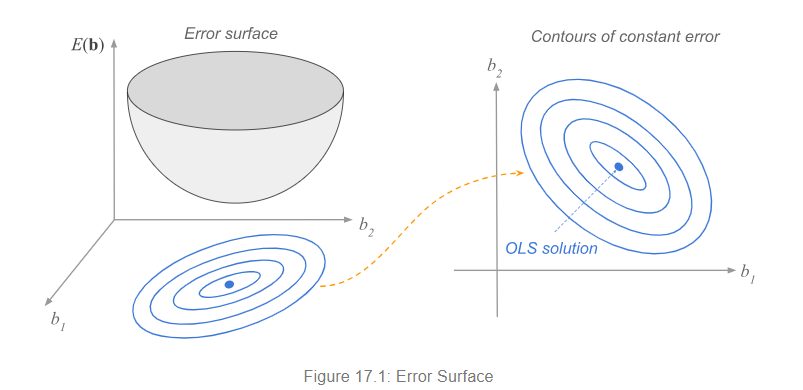

Source: https://online.stat.psu.edu/stat508/lesson/5/5.1

**Observations**:

- Because a general linear or polynomial regression will fail if the independent variables are highly collinear, Ridge regression can be utilized to tackle such situations.

- When we have more parameters than samples,  using Ridge Regression can help.

- The (optimal) value of $\lambda$ is typically obtained using **Cross Validation** ( https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85 , https://scikit-learn.org/stable/modules/cross_validation.html).

#### **🔧 The $\lambda$ Parameter**

In $L_2$ regularization, the penalty term added to the cost function is:

$$
\lambda \sum_{j=1}^{k} \beta_j^2
$$

where:
- $\lambda$ is the **regularization parameter**,  
- $\beta_j$ are the model coefficients.

This penalty **discourages large parameter values**, effectively constraining their magnitude.

---

### 🌀 Geometric Interpretation of $\lambda$

In a two-parameter space $(\beta_1, \beta_2)$, the constraint imposed by the $L_2$ norm can be represented as a **circle**, because all points $(\beta_1, \beta_2)$ satisfying:

$$
\beta_1^2 + \beta_2^2 = c
$$

(for some constant $c$) lie on a circle centered at the origin.  
This circle represents the **boundary** within which the parameter values must lie to keep the regularization penalty below a given threshold.

---

### 🎚️ How $\lambda$ Influences the Model

While $\lambda$ itself does not directly determine the circle’s radius, it controls the **strength of the penalty** applied to large coefficients:

- A **larger $\lambda$** → stronger penalty → coefficients are **shrunk more aggressively** toward zero.  
- A **smaller $\lambda$** → weaker penalty → coefficients are **closer to OLS estimates**.  

In the circular constraint analogy, $\lambda$ affects how tightly the solution is **pulled toward the origin**:
- A high $\lambda$ means a smaller feasible region for $\beta$ (a "tighter" circle).
- A low $\lambda$ means a larger region, allowing coefficients to take on larger values.

---

In summary, the regularization parameter $\lambda$ governs the **bias–variance tradeoff**:
- Increasing $\lambda$ → higher bias, lower variance (simpler model).  
- Decreasing $\lambda$ → lower bias, higher variance (more flexible model).



### **Ridge Regression with Default Parameters**

Let's fit a Ridge Regression model to our data:

In [23]:
ridge_model = Ridge() # Creating Ridge Regression model
ridge_model.fit(x_train, y_train) # Fitting the data into the model

Ridge()

And get the performance metrics on our  test data:

In [24]:
ridge_reg = model_performance_regression(ridge_model, x_test, y_test)
ridge_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144057,2.155826,0.843028,0.842963,19.677968


**Observations:**

- The performance metrics are showing almost similar results as compared to the Least Squares method.

---

<a id="link8"></a>

## (8) 🎯 Ridge Regression with Optimized $\lambda$

Determining the optimal value of $\lambda$ (often denoted as **$\alpha$** in software implementations) is crucial for achieving the right **balance** between:
- Minimizing the model’s **residual sum of squares (RSS)**, and  
- Controlling the **magnitude of coefficients** to prevent overfitting.

---

### ⚙️ Steps to Optimize $\lambda$

1. **🔢 Define a Range of $\lambda$ Values**  
   Begin by specifying a range of candidate $\lambda$ values.  
   Typically, this range spans several **orders of magnitude** (e.g., $10^{-4}$ to $10^{3}$) to explore weak and strong regularization effects.

2. **🔁 Cross-Validation**  
   Use **K-fold Cross-Validation** to assess how model performance varies with each $\lambda$.  
   - The dataset is split into *k* folds.  
   - The model is trained on *k − 1* folds and validated on the remaining fold.  
   - This process repeats *k* times, ensuring robust performance evaluation.

3. **🧩 Grid Search**  
   Perform a **grid search** over the range of $\lambda$ values.  
   For each value of $\lambda$:
   - Fit a Ridge Regression model on the training data.  
   - Evaluate it on the validation data.  
   - Record the performance metric (e.g., Mean Squared Error).

4. **🏆 Select the Optimal $\lambda$**  
   Choose the $\lambda$ that achieves the **lowest average validation error** (or highest performance score).  
   This value represents the best trade-off between bias and variance.

5. **🧪 Final Model Evaluation**  
   Retrain the Ridge model using the **optimal $\lambda$** on the full training dataset,  
   then evaluate it on the **test set** to assess its **generalization performance**.

---

### 💡 Practical Implementation Tip

In **scikit-learn**, the `RidgeCV` class automates this process by:
- Performing cross-validation internally across a grid of $\lambda$ (or $\alpha$) values,  
- Selecting the one that **minimizes cross-validation error**,  
- And returning the corresponding optimized Ridge model.

```python
from sklearn.linear_model import RidgeCV

# Example: Ridge Regression with cross-validation
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
ridge_cv.fit(X_train, y_train)

print("Optimal λ (alpha):", ridge_cv.alpha_)


In [25]:
# Creating K-Fold Cross-Validation Object
folds = KFold(n_splits=10, shuffle=True, random_state=1)

# Defining Hyperparameters to Tune:
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}

# Initializing the Model:
model = Ridge()

# Setting Up GridSearchCV:
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)

# Fitting the Model:
model_cv.fit(x_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

The optimized $\lambda$ parameter is 0.1.

In [26]:
model_cv.best_params_ #getting optimised parameters for alpha

{'alpha': 0.1}

The following  code will generate a table where each row corresponds to a different $\lambda$ value used during the grid search, alongside the mean R-squared value obtained for that $\lambda$ value. This table allows us to directly compare the performance of different regularization strengths in our Ridge regression model.

In [28]:
# Extracting the cross-validation results into a DataFrame
results = pd.DataFrame(model_cv.cv_results_)

# Selecting the parameters and the mean test score columns
results = results[['param_alpha', 'mean_test_score']]

# Renaming the columns for clarity
results.rename(columns={'param_alpha': 'Lambda (α)', 'mean_test_score': 'R-squared'}, inplace=True)


# Displaying the table
print(results)


   Lambda (α)  R-squared
0       0.001   0.842747
1       0.010   0.842747
2       0.100   0.842747
3       0.200   0.842747
4       0.500   0.842747
5       0.900   0.842747
6       1.000   0.842747
7       5.000   0.842746
8      10.000   0.842743
9      20.000   0.842730


We can plot the $\lambda$ values against their corresponding R-squared values to visually analyze how the model's performance varies with different regularization strengths.

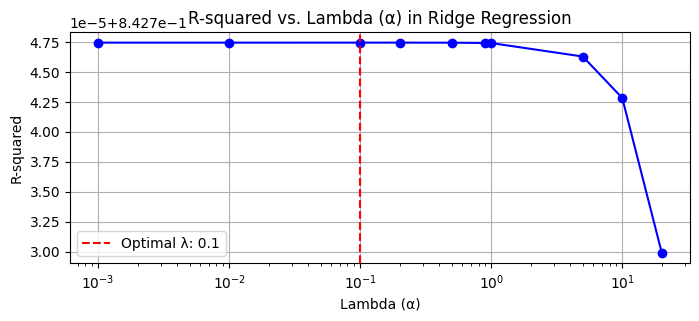

In [29]:
# Converting lambda values from strings to floats for plotting
lambda_values = results['Lambda (α)'].astype(float)

# Finding the optimal lambda value
optimal_lambda = model_cv.best_params_['alpha']

# Plotting
plt.figure(figsize=(8, 3))
plt.plot(lambda_values, results['R-squared'], marker='o', linestyle='-', color='b')
plt.axvline(x=optimal_lambda, color='r', linestyle='--', label=f'Optimal λ: {optimal_lambda}')
plt.title('R-squared vs. Lambda (α) in Ridge Regression')
plt.xlabel('Lambda (α)')
plt.ylabel('R-squared')
plt.legend()
plt.grid(True)
plt.xscale('log')  # Optional: This scales the x-axis to a logarithmic scale for better visualization
plt.show()


After finding the best value of $\lambda$, we create a **tuned** Ridge Regression Model.

In [30]:
ridge_model_tuned = Ridge(alpha=0.1) ##creating Tuned Ridge Regression model using optimised alpha value
ridge_model_tuned.fit(x_train, y_train) # Fitting the data into the tuned model

Ridge(alpha=0.1)

We can now compare the coefficients of the default and tuned models.

In [31]:
# Extracting the coefficients from both models
coefficients_default = ridge_model.coef_
coefficients_tuned = ridge_model_tuned.coef_

# Creating a DataFrame with feature names
coef_df = pd.DataFrame(index=x_train.columns)

# Adding the coefficients from both models to the DataFrame
coef_df['Default Coefficients'] = coefficients_default
coef_df['Tuned Coefficients'] = coefficients_tuned

# Resetting the index to add the feature names as a column
coef_df.reset_index(inplace=True)
coef_df.rename(columns={'index': 'Feature'}, inplace=True)

# Displaying the table
print(coef_df)


                                  Feature  Default Coefficients  \
0       Available Extra Rooms in Hospital              0.078601   
1                         staff_available             -0.000923   
2                   Visitors with Patient              0.000220   
3                       Admission_Deposit             -0.000038   
4                   Department_anesthesia              6.081468   
5                   Department_gynecology             -3.973756   
6                 Department_radiotherapy             -4.622067   
7                      Department_surgery              6.875058   
8                    Ward_Facility_Code_B             -1.221912   
9                    Ward_Facility_Code_C              0.434354   
10                   Ward_Facility_Code_D             -1.275633   
11                   Ward_Facility_Code_E              0.308281   
12                   Ward_Facility_Code_F             -1.476209   
13                    doctor_name_Dr John              0.23859

Let's export this table to an HTML file:

In [35]:

coef_df.to_html('/Users/fernandodiaz/Library/CloudStorage/OneDrive-UniversidadTécnicaFedericoSantaMaría/Machine Learning Supervisado/Data/coef_df.html')
print("DataFrame has been exported to 'coef_df.html'.")

DataFrame has been exported to 'coef_df.html'.


As can be seen, both set of estimated coefficients are almots identycal. Finally, we obtain the performance metrics of the tuned model in the test data set.

In [39]:
ridge_reg_tuned = model_performance_regression(ridge_model_tuned, x_test, y_test) #getting performance metrics on test data
ridge_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144055,2.155771,0.843028,0.842964,19.677066


**Observations:**

- After applying the Grid SearchCV, the optimized value of alpha results out to be 0.1.
- It can be observed that after tuning the parameters of Ridge Regression, the performance parameters does not change implying that Ridge Regression does not help in improving the model.
- Furthermore, and not surprisingly, the coefficients of the default and tuned models are almost identical.

---

<a id="link9"></a>

## (9) 🧩 LASSO (Least Absolute Shrinkage and Selection Operator) Regression ($L_1$ Regularization)

**LASSO regression** is another powerful regularization technique designed to reduce model complexity and prevent overfitting.  
It is conceptually similar to **Ridge Regression**, but it differs in one crucial aspect:  
👉 The penalty term involves the **absolute values** of the coefficients rather than their squares.

---

### ⚙️ The $L_1$ Penalty

The $L_1$ regularization term penalizes the **sum of absolute coefficient magnitudes**, mathematically defined as:

$$
\text{L1 penalty} = \lambda \sum_{j=1}^{k} | \beta_j |
$$

where:
- $\beta_j$ represents the coefficient of the $j^{th}$ predictor,  
- $k$ is the total number of predictors, and  
- $\lambda$ is the regularization parameter controlling the strength of the penalty.

---

### 📉 LASSO Optimization Problem

The **LASSO estimator**, denoted by $\hat{\beta}_{LASSO}$, solves the following minimization problem:

$$
\min_{\beta} \sum_{i=1}^n \left(y_i - \sum_{j=1}^k x_{ij}\beta_j\right)^2 
\;+\;
\lambda \sum_{j=1}^{k} | \beta_j |
$$

This adds the $L_1$ penalty directly to the OLS loss function, penalizing large coefficients.  

---

### 🔍 Key Distinction from Ridge Regression

Unlike Ridge Regression, which **shrinks coefficients continuously toward zero** but rarely makes them exactly zero,  
**LASSO can shrink some coefficients to exactly zero**, effectively **removing those predictors** from the model.  

This results in:
- **Sparser models** (fewer active predictors)  
- **Automatic feature selection** capability  
- Easier interpretation in high-dimensional settings  

---

### 🧮 Geometric Intuition

For the simple case with two parameters ($k=2$), the constraint imposed by the $L_1$ norm forms a **diamond-shaped region**:

$$
| \beta_1 | + | \beta_2 | = c
$$

When this constraint region intersects the elliptical contours of the OLS cost function,  
the **corners of the diamond** often coincide with the optimal solution —  
producing one or more coefficients that are exactly zero.

---

### 📊 Visual Representation

![LASSO Constraint Geometry](Figures/LASSO%201%20Large.jpg)

📘 *Source: [allmodelsarewrong.github.io/lasso.html](https://allmodelsarewrong.github.io/lasso.html)*

---

🧠 **Key takeaway:**  
The LASSO encourages both **shrinkage** and **sparsity**,  
making it a natural choice when interpretability and feature selection are important.

---


Interestingly, using LASSO, we can have the following situation, which leads to variable selection and sparser models:

![LASSO 2 Illustration](Figures/LASSO%202%20Large.jpg)

📘 *Source: [allmodelsarewrong.github.io/lasso.html](https://allmodelsarewrong.github.io/lasso.html)*


(See a video explanation at: https://youtu.be/14MKVkhvMus)

### Lasso Regression with Default Parameters

In [40]:
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

Lasso()

In [41]:
lasso_reg = model_performance_regression(lasso_model, x_test, y_test)
lasso_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.064339,3.873332,0.416006,0.415766,34.652716


**Observations:**

- After fitting the data into Lasso Regression Model with default value of $\lambda=1$ (or $\alpha$), the performance metrics are showing poor results as compared to Least Squares method and Ridge Regression.
- We can tune the $\lambda$ to get the optimized value using `Grid SearchCV`.

---

<a id="link10"></a>

## (10) 🎯 LASSO Regression with Optimized $\lambda$

As with Ridge Regression, the performance of **LASSO** depends critically on the choice of the **regularization parameter $\lambda$** (often denoted as **$\alpha$** in software packages such as scikit-learn).  
This parameter determines how strongly the model penalizes large coefficients — balancing bias, variance, and model sparsity.

---

### ⚙️ Steps to Determine the Optimal $\lambda$

1. **📏 Define a Range of $\lambda$ Values**  
   Choose a set of candidate $\lambda$ values (e.g., on a logarithmic scale) to explore both weak and strong regularization.  
   A very small $\lambda$ behaves like OLS (no regularization), while a very large $\lambda$ forces most coefficients toward zero.

2. **🔁 Perform Cross-Validation (CV)**  
   Use **K-fold cross-validation** to evaluate model performance for each $\lambda$:
   - Split the training data into *k* subsets (folds).  
   - Train the model on *k−1* folds and validate it on the remaining one.  
   - Repeat *k* times, and average the validation errors.  
   - This provides a stable estimate of the model’s generalization performance.

3. **🧮 Select the Optimal $\lambda$**  
   The $\lambda$ value that **minimizes the cross-validation error** (or equivalently maximizes the $R^2$ score) is chosen as the optimal penalty level.

4. **🚀 Refit the Model**  
   With the optimal $\lambda$, refit the LASSO model using the **entire training set** and evaluate its performance on the **test data**.

---

### 💻 Implementation Example (using `LassoCV`)

Scikit-learn provides the convenient `LassoCV` class, which automates this process:

```python
from sklearn.linear_model import LassoCV

# Perform 5-fold cross-validation across a range of lambda values
lasso_cv = LassoCV(alphas=None, cv=5, max_iter=10000, normalize=True)
lasso_cv.fit(X_train, y_train)

# Extract the optimal alpha (lambda)
print("Optimal λ (alpha):", lasso_cv.alpha_)


In [42]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [43]:
model_cv.best_params_

{'alpha': 0.001}

**Observations**:

* In this case, the optimal value of $\lambda$ is at the lower limit of the grid. In such a case, it is a good idea to check whether smaller values improve the test results.

In [44]:
# This will take a while to run....

folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.00001, 0.00005]}
model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(), param_grid={'alpha': [1e-05, 5e-05]},
             return_train_score=True, scoring='r2')

In [46]:
model_cv.best_params_

{'alpha': 1e-05}

**Observations**:

* We keep *bouncing* against the lower limit of the grid even with very small values for $\lambda$.

* Since the value of $\lambda$ influences the strength of the penalty for parameters being away from zero, a lower $\lambda$ means a weaker penalty for parameters being away from zero.

* This suggests that the optimal fit only involves a small amount of shrinkage relative to the least square solution.

Let's generate a table with the different $\lambda$ values and their corresponding mean R-squared. We will also generate the associated plot.

In [45]:
# This will take a while to run....

folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.00001, 0.0001,0.001,0.01,0.1,1]}
model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             return_train_score=True, scoring='r2')

In [47]:
results = pd.DataFrame(model_cv.cv_results_)
results = results[['param_alpha', 'mean_test_score']]
results.rename(columns={'param_alpha': 'Lambda (α)', 'mean_test_score': 'R-squared'}, inplace=True)
print(results)

   Lambda (α)  R-squared
0     0.00001   0.842748
1     0.00010   0.842747
2     0.00100   0.842738
3     0.01000   0.842029
4     0.10000   0.798587
5     1.00000   0.417511


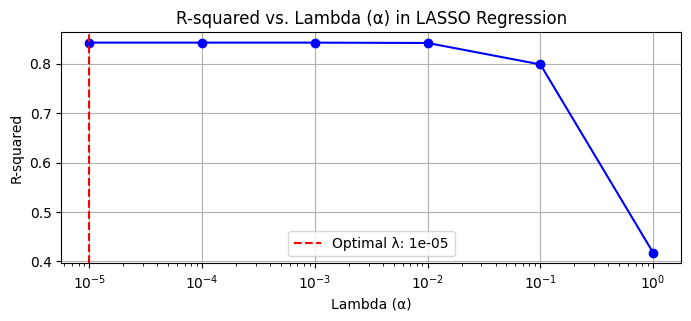

In [48]:
lambda_values = results['Lambda (α)'].astype(float)

optimal_lambda = model_cv.best_params_['alpha']

# Plotting
plt.figure(figsize=(8, 3))
plt.plot(lambda_values, results['R-squared'], marker='o', linestyle='-', color='b')
plt.axvline(x=optimal_lambda, color='r', linestyle='--', label=f'Optimal λ: {optimal_lambda}')
plt.title('R-squared vs. Lambda (α) in LASSO Regression')
plt.xlabel('Lambda (α)')
plt.ylabel('R-squared')
plt.legend()
plt.grid(True)
plt.xscale('log')  # Optional: This scales the x-axis to a logarithmic scale for better visualization
plt.show()

We get similar results. What if we choose a different fit metric? For instance, the MAE is less sensitive to outliers compared to R-squared.

In [49]:
# This will take a while to run....

folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.00001, 0.0001,0.001,0.01,0.1,1]}
model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_absolute_error', cv=folds, return_train_score=True)
model_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [50]:
model_cv.best_params_

{'alpha': 1e-05}

In [51]:
results = pd.DataFrame(model_cv.cv_results_)
results = results[['param_alpha', 'mean_test_score']]
results.rename(columns={'param_alpha': 'Lambda (α)', 'mean_test_score': '(neg) MAE'}, inplace=True)

print(results)

   Lambda (α)  (neg) MAE
0     0.00001  -2.146582
1     0.00010  -2.146748
2     0.00100  -2.147923
3     0.01000  -2.164396
4     0.10000  -2.506707
5     1.00000  -3.854096


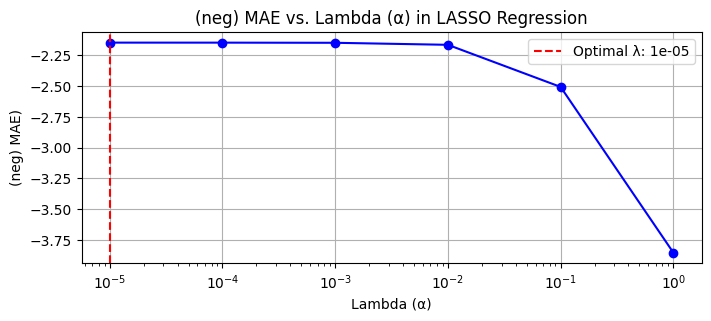

In [52]:
lambda_values = results['Lambda (α)'].astype(float)
optimal_lambda = model_cv.best_params_['alpha']

# Plotting
plt.figure(figsize=(8, 3))
plt.plot(lambda_values, results['(neg) MAE'], marker='o', linestyle='-', color='b')
plt.axvline(x=optimal_lambda, color='r', linestyle='--', label=f'Optimal λ: {optimal_lambda}')
plt.title('(neg) MAE vs. Lambda (α) in LASSO Regression')
plt.xlabel('Lambda (α)')
plt.ylabel('(neg) MAE)')
plt.legend()
plt.grid(True)
plt.xscale('log')  # Optional: This scales the x-axis to a logarithmic scale for better visualization
plt.show()

Again, very small values of $\lambda$ seem to be optimal.

After deciding on the best value of $\lambda$, we create a **tuned** LASSO Regression Model. A value of $\lambda$ of 0.001 seems to be a reasonable choice:

In [53]:
lasso_model_tuned = Lasso(alpha=0.001)
lasso_model_tuned.fit(x_train, y_train)

Lasso(alpha=0.001)

It will be interesting to compare the coefficients of the default ($\lambda=1$) and tuned models ($\lambda=0.001$).

In [54]:
# Extracting the coefficients from both models
coefficients_default = lasso_model.coef_
coefficients_tuned = lasso_model_tuned.coef_

# Creating a DataFrame with feature names
coef_df = pd.DataFrame(index=x_train.columns)

# Adding the coefficients from both models to the DataFrame
coef_df['Default Coefficients'] = coefficients_default
coef_df['Tuned Coefficients'] = coefficients_tuned

# Resetting the index to add the feature names as a column
coef_df.reset_index(inplace=True)
coef_df.rename(columns={'index': 'Feature'}, inplace=True)

# Displaying the table
print(coef_df)


                                  Feature  Default Coefficients  \
0       Available Extra Rooms in Hospital              0.000000   
1                         staff_available              0.000000   
2                   Visitors with Patient              0.000000   
3                       Admission_Deposit              0.000196   
4                   Department_anesthesia              0.000000   
5                   Department_gynecology             -7.291335   
6                 Department_radiotherapy             -0.000000   
7                      Department_surgery              0.000000   
8                    Ward_Facility_Code_B             -0.000000   
9                    Ward_Facility_Code_C              0.000000   
10                   Ward_Facility_Code_D             -0.000000   
11                   Ward_Facility_Code_E              0.000000   
12                   Ward_Facility_Code_F             -0.000000   
13                    doctor_name_Dr John              0.00000

For better visualization, we can export the table to html.

In [55]:
coef_df.to_html('/Users/fernandodiaz/Library/CloudStorage/OneDrive-UniversidadTécnicaFedericoSantaMaría/Machine Learning Supervisado/Data/coef_df_LASSO.html')
print("DataFrame has been exported to 'coef_df_LASSO.html'.")

DataFrame has been exported to 'coef_df_LASSO.html'.


**Observations**:

* With $\lambda=1$, too much penalty was imposed on the size of the coefficients, resulting in many coefficients being set to zero.

* As a result, a lot of bias was introduced into the model, resulting in poor performance.

Finally, we obtain the performance metrics of the tuned model in the test data set.

In [56]:
lasso_reg_tuned = model_performance_regression(lasso_model_tuned, x_test, y_test)
lasso_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144315,2.157198,0.843002,0.842938,19.702959


**Observation:**

- The performance metrics are showing similar results as compared to Least Squares method and Ridge Regression, implying that after adding the penalty, the model does not improve.